In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading dataset
data = pd.read_csv('Train.csv')
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [2]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Print columns with missing values and their count
print("Columns with missing values:")
print(missing_values)

# Check for duplicate rows in the dataset
duplicate_rows = data.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_rows)

Columns with missing values:
ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Number of duplicate rows: 0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [4]:
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


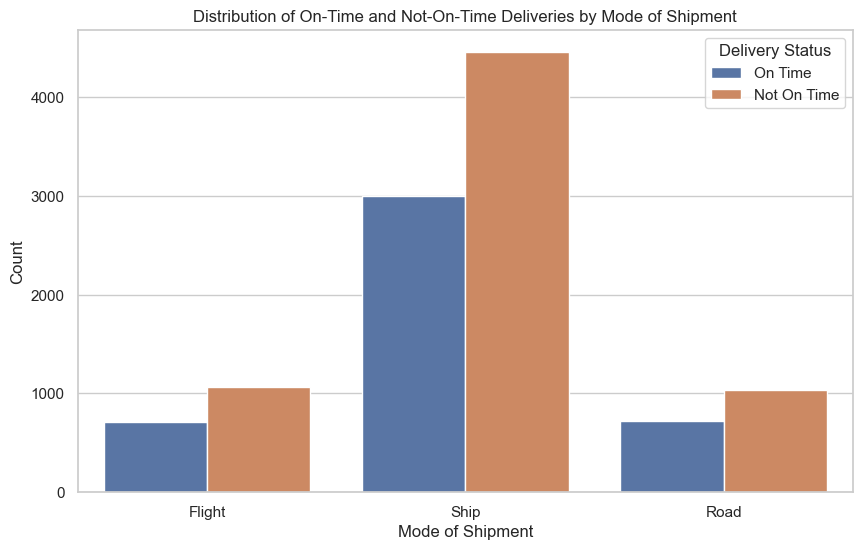

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapping for Mode_of_Shipment labels
mode_mapping = {0: 'Ship', 1: 'Flight', 2: 'Road'}

# Replace numerical labels with categorical labels
##########

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Countplot to visualize the distribution of on-time and not-on-time deliveries for each mode of shipment
sns.countplot(x='Mode_of_Shipment', hue='Reached.on.Time_Y.N', data=data)

plt.title('Distribution of On-Time and Not-On-Time Deliveries by Mode of Shipment')
plt.xlabel('Mode of Shipment')
plt.ylabel('Count')
plt.legend(title='Delivery Status', loc='upper right', labels=['On Time', 'Not On Time'])

plt.show()


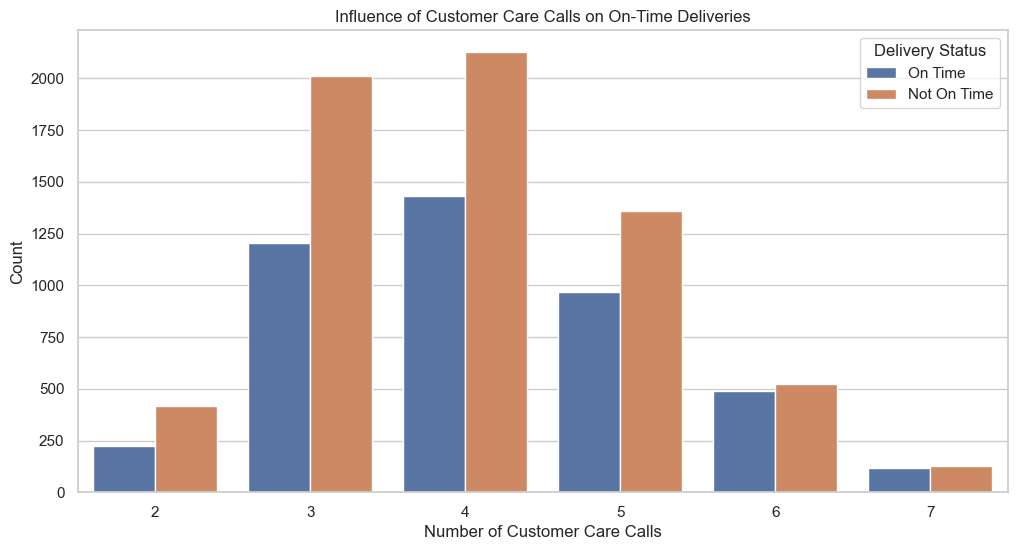

In [6]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.countplot(x='Customer_care_calls', hue='Reached.on.Time_Y.N', data=data)

plt.title('Influence of Customer Care Calls on On-Time Deliveries')
plt.xlabel('Number of Customer Care Calls')
plt.ylabel('Count')
plt.legend(title='Delivery Status', loc='upper right', labels=['On Time', 'Not On Time'])

plt.show()

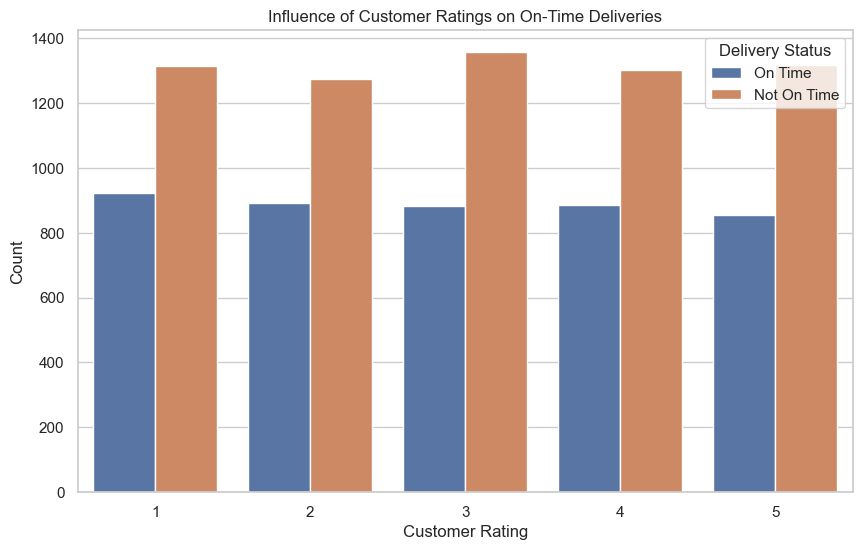

In [7]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.countplot(x='Customer_rating', hue='Reached.on.Time_Y.N', data=data)

plt.title('Influence of Customer Ratings on On-Time Deliveries')
plt.xlabel('Customer Rating')
plt.ylabel('Count')
plt.legend(title='Delivery Status', loc='upper right', labels=['On Time', 'Not On Time'])

plt.show()

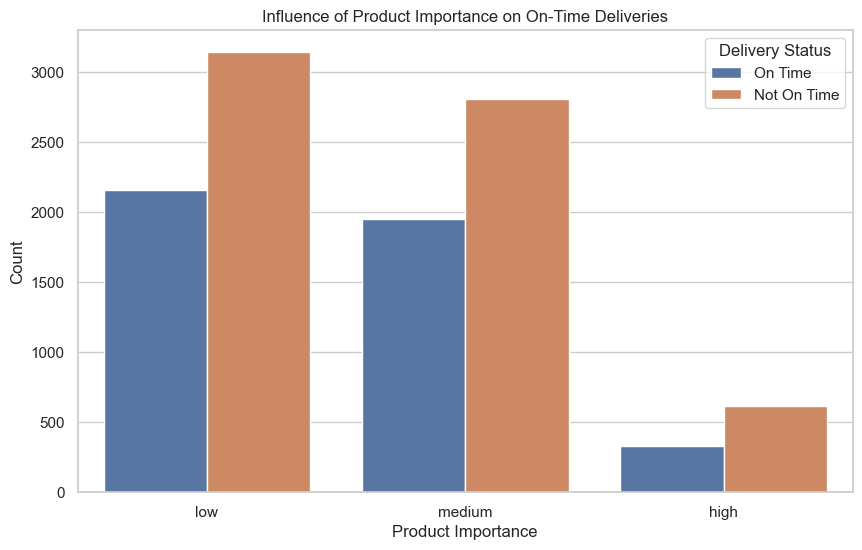

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.countplot(x='Product_importance', hue='Reached.on.Time_Y.N', data=data)

plt.title('Influence of Product Importance on On-Time Deliveries')
plt.xlabel('Product Importance')
plt.ylabel('Count')
plt.legend(title='Delivery Status', loc='upper right', labels=['On Time', 'Not On Time'])

plt.show()

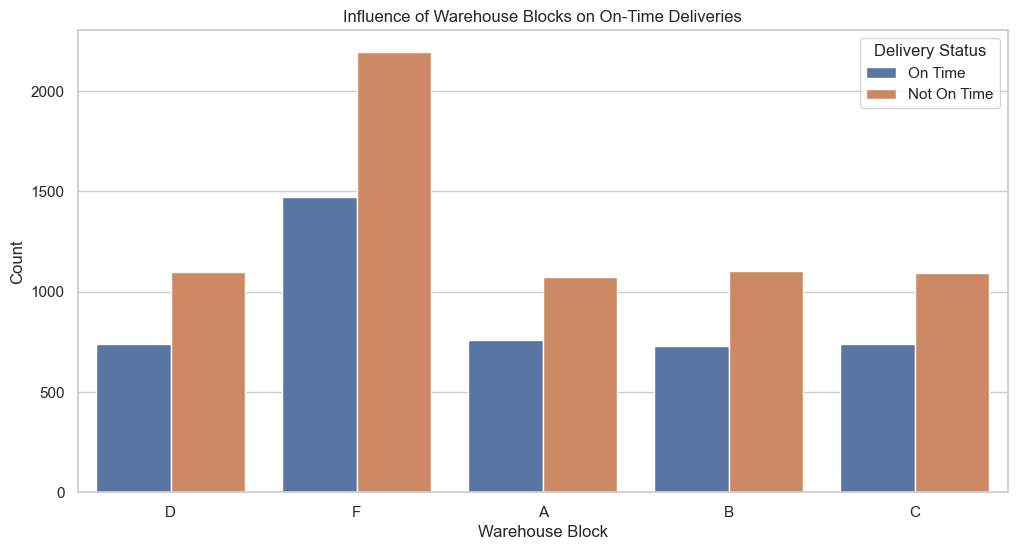

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.countplot(x='Warehouse_block', hue='Reached.on.Time_Y.N', data=data)

plt.title('Influence of Warehouse Blocks on On-Time Deliveries')
plt.xlabel('Warehouse Block')
plt.ylabel('Count')
plt.legend(title='Delivery Status', loc='upper right', labels=['On Time', 'Not On Time'])

plt.show()

C:\Users\hang\AppData\Local\Temp\ipykernel_29436\3711884466.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(data.corr(),annot = True,cmap = 'RdBu')


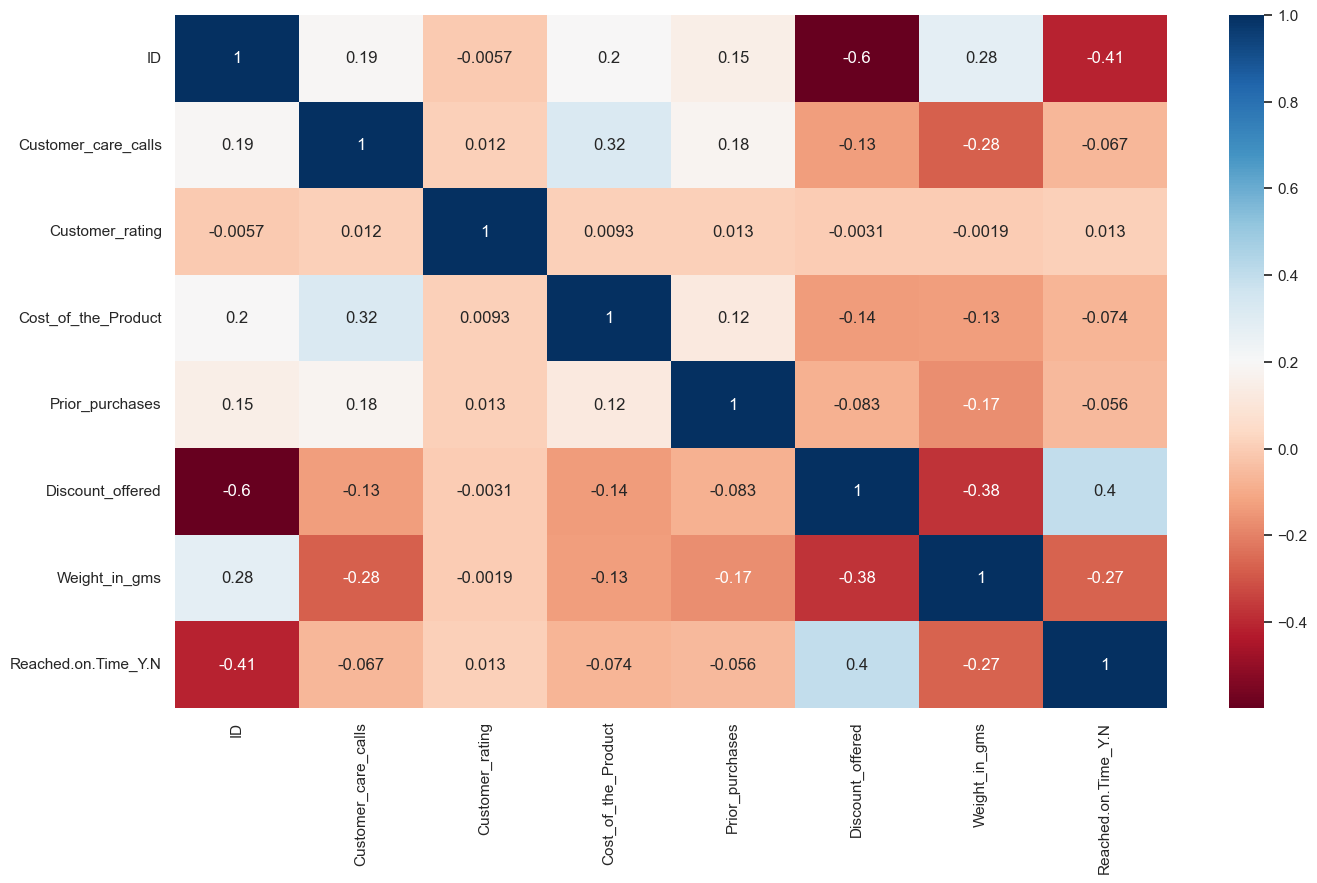

In [10]:
#Heatmap
plt.figure(figsize=(16,9))
x = data.drop(['ID','Warehouse_block','Mode_of_Shipment','Product_importance','Gender'],axis = 1)
ax = sns.heatmap(data.corr(),annot = True,cmap = 'RdBu')
plt.show()

In [11]:
# Data preprocessing
# Convert categorical variables to numerical representations
le_dict = {}  # Dictionary to store label encoders for each categorical column

categorical_columns = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    le_dict[column] = le

# Feature scaling
scaler = StandardScaler()
numerical_features = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
                       'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [12]:
# Define features and target variable
X = data.drop(['Reached.on.Time_Y.N', 'ID'], axis=1) 
y = data['Reached.on.Time_Y.N']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN model

In [13]:
# Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Example of using the trained model for new data
new_data = pd.DataFrame({
    'Warehouse_block': ['E'],
    'Mode_of_Shipment': ['Flight'],
    'Customer_care_calls': [500],
    'Customer_rating': [0],
    'Cost_of_the_Product': [75.0],
    'Prior_purchases': [4],
    'Product_importance': ['low'],
    'Gender': ['Male'],
    'Discount_offered': [5.0],
    'Weight_in_gms': [1500.0]
})

# Transform categorical columns using the label encoders, handling unknown labels
for column, le in le_dict.items():
    new_data[column] = new_data[column].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)

# Feature scaling for new data
new_data[numerical_features] = scaler.transform(new_data[numerical_features])

# Exclude 'ID' from new data
new_instance_scaled = new_data  # No need to drop 'ID' as it's not present in new_data

# Use the trained model to make predictions on new data
new_prediction = knn_model.predict(new_instance_scaled)

# Display the prediction for the new instance
print(f'Prediction for the new instance: {new_prediction}')


Accuracy: 0.634090909090909
Confusion Matrix:
[[521 374]
 [431 874]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.58      0.56       895
           1       0.70      0.67      0.68      1305

    accuracy                           0.63      2200
   macro avg       0.62      0.63      0.62      2200
weighted avg       0.64      0.63      0.64      2200

Prediction for the new instance: [1]


# Classification & Tree Regression

In [16]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn.tree import plot_tree

In [29]:
# Fit the decision tree
classTree = DecisionTreeClassifier(random_state=0, max_depth=4)
classTree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

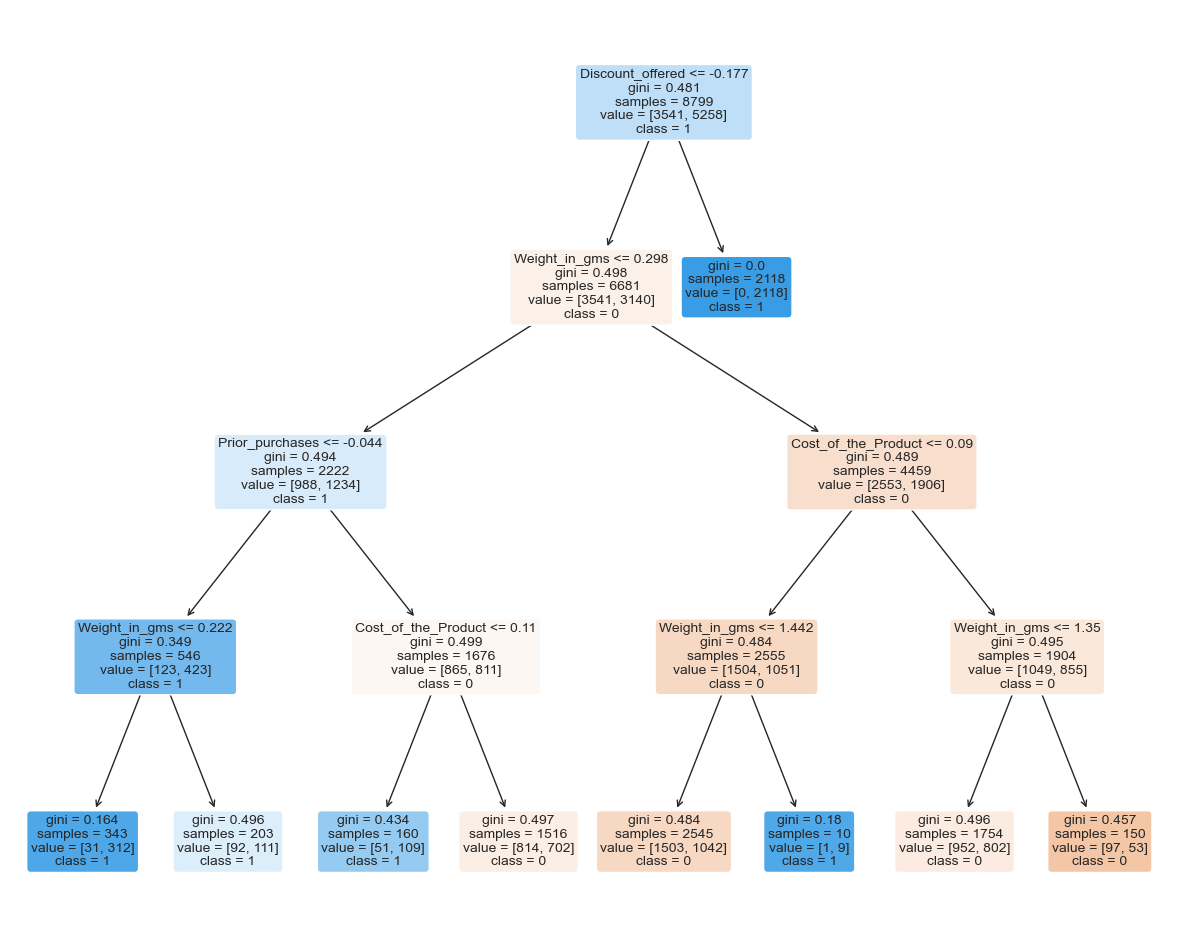

In [18]:
#Plot the decision tree
plt.figure(figsize=(15, 12))
plot_tree(classTree, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True, fontsize=10)
plt.show()

In [19]:
# Make the prediction for new data
prediction = classTree.predict(new_data)
print(prediction)

[1]


In [20]:
# Make predictions on the test set
y_pred_CART = classTree.predict(X_test)
#Accuracy of CART
accuracy_CART = accuracy_score(y_test, y_pred_CART).round(4)
print("Accuracy of CART is: ",accuracy_CART*100,"%")

Accuracy of CART is:  68.45 %


# Naive Bayes

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pylab as plt
from dmba import classificationSummary
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [23]:
# run naive Bayes
data_nb = MultinomialNB(alpha=0.01)
data_nb.fit(X_train_scaled, y_train)
# predict probabilities 
predProb_train = data_nb.predict_proba(X_train_scaled)
predProb_valid = data_nb.predict_proba(X_test)
# predict class membership 
y_test_pred_nb = data_nb.predict(X_test)
y_train_pred_nb = data_nb.predict(X_train_scaled)

C:\Users\hang\anaconda3\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
C:\Users\hang\anaconda3\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


In [24]:
#Predict new data
predictions_nb = data_nb.predict(new_data)
print(predictions_nb)

[0]


C:\Users\hang\anaconda3\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


In [25]:
#Accuracy of Naive Bayes
accuracy_nb = accuracy_score(y_test, y_test_pred_nb).round(4)
print("Accuracy of Naive Bayes is: ",accuracy_nb* 100, "%")

Accuracy of Naive Bayes is:  66.05 %


# Logistic Regression


In [26]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from mord import LogisticIT
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Creating a Logistic Regression model
classifier = LogisticRegression()

# Fitting the model to the training data
classifier.fit(X_train, y_train)


# Make the prediction for new data
prediction = classifier.predict(new_data)

print(prediction)

# Predicting the Test set results
y_pred_class = classifier.predict(X_test)


# Evaluating the Model
accuracy_class = accuracy_score(y_test, y_pred_class)

print("Accuracy of Logistic Regression is ", accuracy_class * 100, "%")


[0]
Accuracy of Logistic Regression is  63.5 %


In [30]:
from tabulate import tabulate
data = {
    "Algorithm": ["KNN", "Naive Bayes", "Regression Tree", "Logistics Regression"],
    "Accuracy": [63,66.05,68.45,63.5],
    }
df = pd.DataFrame(data)
table = tabulate(df, headers="keys", tablefmt="grid")
print(table)

+----+----------------------+------------+
|    | Algorithm            |   Accuracy |
+====+======================+============+
|  0 | KNN                  |      63    |
+----+----------------------+------------+
|  1 | Naive Bayes          |      66.05 |
+----+----------------------+------------+
|  2 | Regression Tree      |      68.45 |
+----+----------------------+------------+
|  3 | Logistics Regression |      63.5  |
+----+----------------------+------------+


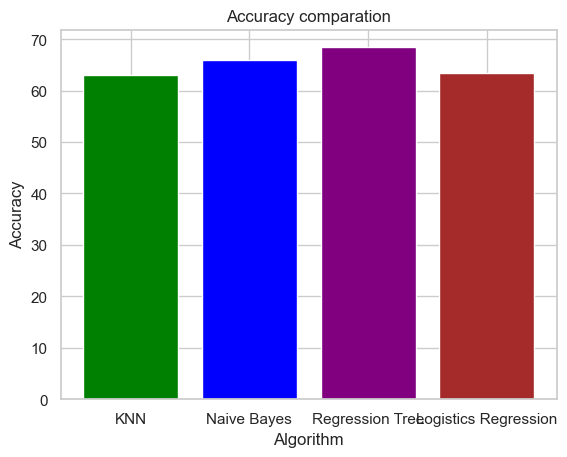

In [34]:
import matplotlib.pyplot as plt

x_axis = ["KNN", "Naive Bayes", "Regression Tree", "Logistics Regression"]
y_axis = [63,66.05,68.45,63.5]
colors = ['green','blue','purple','brown']
plt.bar(x_axis, y_axis, color = colors)
plt.title('Accuracy comparation')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.show()